## Ultra Light задание
Проведите эксперименты по классификации MNIST для различных значений гиперпараметров:

learningRate : [0.01,0.001]

размер скрытого слоя  : [128,256,512]

batchSizes : [32,64,128]

Результаты занесите в таблицу





In [ ]:
# Этим блоком будем визуализировать
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy

# Библиотеки Pytorch
import torch 
import torchvision # здесь лежит mnist, cifar и много других датасетов и трансформаций для картинок
import torch.nn as nn # здесь лежат все слои
import torch.utils.data as data # работа с загрузчиком данных
import torchvision.transforms as transforms
import torchvision.datasets as dsets #работа с классом Датасет
from torch.autograd import Variable # для автоматического дифференциатора
import pandas as pd
# Визуализации графа
from torch.utils.tensorboard import SummaryWriter 
import datetime,os
import time

In [ ]:
scipy.__version__

# Если версия меньше 1.2.0, то:
# pip uninstall scipy==**ваша версия**
# pip install scipy==1.3.1 

'1.4.1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install Pillow

In [ ]:
# Создаем класс для собственных данных, наследуя свойства стандартного датасета
class CustomDataset(data.Dataset):
    def __init__(self, listID, labels, path, transforms = None): 
        # Инициализируем атрибуты (они абсолютно производные. У вас они могут быть совсем другими)
        self.listID = listID # listID список имен каждого экземпляра
        self.labels = labels # labels - то, что скормим как yTrain
        self.transforms = transforms # если нужны какие-то преобразования
        self.path = path # путь, где лежат данные
        

    def __getitem__(self, index):        
        # Открываем папку с данными (можно использовать numpy.fromfile, PIL.Image.open)
        ID = self.listID[index] # итерируем по каждому элементу в списке
        image = Image.open(path+ID) # извлекаем картинку по его ID

        # Если transforms заполнено, то:
        if self.transforms:
            image = self.transforms(image) # то, что лежит в transforms применяем к картинку
        trainX = image # наша картинка уходит в xTrain для этой итерации
        trainY = self.labels[index] # лейбл для этой картинки уходит в yTrain
        

        # Возвращаем пару экзмепляр-метка
        return trainX, trainY

    def __len__(self):
        # Здесь общий размер вашего датасета
        return len(listID)

In [ ]:
inputSize = 784
numClasses = 10
numEpochs = 10

Загружаем данные 

In [ ]:
# Создаем класс
class Classification(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__() # наследуе все свойства + добавляем свое
        self.layer1 = nn.Linear(inputSize, hidden_size) # первый слой - линейный
        self.relu = nn.ReLU() 
        self.layer2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax() # Поскольку задача классификации, то функция активации softmax

    def forward(self, x): # Здесь мы прописываем принципы, по которым данные будут проходить через сеть
        out = self.layer1(x)  # выход первого слоя
        out = self.relu(out) # применяем функцию активации к выходу первого слоя
        out = self.layer2(out) # передаем это во второй слой
        out = self.softmax(out) # применяем функцию активации ко второму слою
        return out

model = Classification(inputSize, hidden, numClasses) # Создаем объект нашей полносвязной сети

In [ ]:
class Static_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(784, 200)
    self.layer2 = nn.Linear(200, 10)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax()
    self.tanh = nn.Tanh()

  def forward(self, x):

    x = self.layer1(x)
    x = self.relu(x)
    x = self.softmax(self.layer2(x))
    return x

In [ ]:
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)  # оптимизатор
losses = [] # сюда будет добавляться средняя ошибка. Список будем использовать для построения графика
model.train() # переход в режим обучения (опционально)

Classification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)

0.01-learningRate-128-hidden-32-batchSize


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Эпоха: [1/10], Ошибка: 0.0250
Эпоха: [2/10], Ошибка: 0.0298
Эпоха: [3/10], Ошибка: 0.0250
Эпоха: [4/10], Ошибка: 0.0283
Эпоха: [5/10], Ошибка: 0.0160
Эпоха: [6/10], Ошибка: 0.0370
Эпоха: [7/10], Ошибка: 0.0285
Эпоха: [8/10], Ошибка: 0.0030
Эпоха: [9/10], Ошибка: 0.0086
Эпоха: [10/10], Ошибка: 0.0093
0.01-learningRate-128-hidden-64-batchSize
Эпоха: [1/10], Ошибка: 0.0017
Эпоха: [2/10], Ошибка: 0.0394
Эпоха: [3/10], Ошибка: 0.0032
Эпоха: [4/10], Ошибка: 0.0095
Эпоха: [5/10], Ошибка: 0.0438
Эпоха: [6/10], Ошибка: 0.0018
Эпоха: [7/10], Ошибка: 0.0739
Эпоха: [8/10], Ошибка: 0.0278
Эпоха: [9/10], Ошибка: 0.0027
Эпоха: [10/10], Ошибка: 0.0148
0.01-learningRate-128-hidden-128-batchSize
Эпоха: [1/10], Ошибка: 0.0418
Эпоха: [2/10], Ошибка: 0.0321
Эпоха: [3/10], Ошибка: 0.0126
Эпоха: [4/10], Ошибка: 0.0360
Эпоха: [5/10], Ошибка: 0.0085
Эпоха: [6/10], Ошибка: 0.0279
Эпоха: [7/10], Ошибка: 0.0181
Эпоха: [8/10], Ошибка: 0.0089
Эпоха: [9/10], Ошибка: 0.0311
Эпоха: [10/10], Ошибка: 0.0369
0.01-learnin

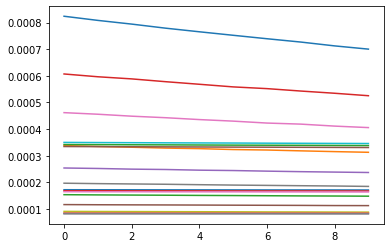

In [ ]:
learningRates = [0.01,0.001]
hiddens = [128,256,512]
batchSizes = [32,64,128]
df=pd.DataFrame(columns=['train score'])
for learningRate in learningRates:
  for hidden in hiddens:
    for batchSize in batchSizes:
        NAME = "{}-learningRate-{}-hidden-{}-batchSize".format( learningRate,hidden, batchSize)
        print(NAME)
        # Обучающая выборка
        trainDataset = dsets.MNIST(root='./data', 
                                    train=True, 
                                    transform=transforms.ToTensor(),
                                    download=True)
        # Тестовая выборка
        testDataset = dsets.MNIST(root='./data', 
                                  train=False, 
                                  transform=transforms.ToTensor())

        # Dataset Loader (подготовка данных для сети)
        trainLoader = torch.utils.data.DataLoader(dataset=trainDataset, # Какой датасет
                                                  batch_size=batchSize, # На сколько batch разделен
                                                  shuffle=True) 

        testLoader = torch.utils.data.DataLoader(dataset=testDataset, #  Какой датасет
                                                  batch_size=batchSize, # На сколько batch разделен
                                                  shuffle=False)
                # Посмотрим на нашу выборку
        dataIter = iter(trainLoader) # По какой выборке пройдемся
        trainX, trainY = dataIter.next() # Присваиваем текущий batch
        criterion = nn.CrossEntropyLoss() 
        optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)  # оптимизатор
        losses = [] # сюда будет добавляться средняя ошибка. Список будем использовать для построения графика
        model.train() # переход в режим обучения (опционально)
        for epoch in range(numEpochs): # количество эпох
        # for epoch in range(2): # количество эпох
            lossTot = 0 # потери в совокупности

            for i, (images, labels) in enumerate(trainLoader): # проходимся по всем данным в batch
                images = images.view(-1, 28*28) # приводим к правильному формату для сетки
                optimizer.zero_grad() # обнуляем градиент
                outputs = model(images) # здесь наше предсказание
                loss = criterion(outputs.log(), labels) # считаем ошибку 
                loss.backward()  # обратное распространение. 
                                # x.grad += dloss/dx для всех параметров x

                lossTot +=loss.detach().data # инкремент ошибки
                
                optimizer.step() # следующий шаг спуска

            losses.append(lossTot/len(trainDataset)) # вычисляем среднюю ошибку и добавляем в список
            print('Эпоха: [%d/%d], Ошибка: %.4f' 
                  % (epoch+1, numEpochs, loss))
        plt.plot(losses) # График нашего обучения
        # проверка
        correct = 0
        total = 0

        model.eval() # режим проверки

        for images, labels in testLoader: # итерируем по проверочному датасету
            images = images.view(-1, 28*28) # приводим к нужному формату
            result = labels
            outputs = model(images) # делаем прогноз
            _, predicted = torch.max(outputs.data, 1) # _ максимальное значение пропускаем, нас интересует, что это за цифра
            total += labels.size(0) # 0 - первое/единственное значение
            correct += (predicted == labels).sum() 
            
        # print( (100 * correct.item() / total))
        df=df.append(pd.DataFrame(data={'train score':100 * correct.item() / total},index=[NAME]))


In [ ]:
df

,train score
0.01-learningRate-128-hidden-32-batchSize,98.00
0.01-learningRate-128-hidden-64-batchSize,98.01
0.01-learningRate-128-hidden-128-batchSize,98.02
0.01-learningRate-256-hidden-32-batchSize,98.04
0.01-learningRate-256-hidden-64-batchSize,98.06
0.01-learningRate-256-hidden-128-batchSize,98.05
0.01-learningRate-512-hidden-32-batchSize,98.09
0.01-learningRate-512-hidden-64-batchSize,98.09
0.01-learningRate-512-hidden-128-batchSize,98.09
0.001-learningRate-128-hidden-32-batchSize,98.10


In [ ]:
df[df['train score'] == df['train score'].max()]

,train score
0.001-learningRate-256-hidden-64-batchSize,98.11
